In [1]:
from MIOFlow.models import make_model
import torch

In [18]:
batch_size = 32
feature_dim = 3
output_dim = 3

x = torch.randn(batch_size, feature_dim)
# m0 = torch.ones(batch_size, 1)
# xm = torch.cat([x, m0], dim=1)
t = torch.linspace(0, 1, 7)

model = make_model(feature_dims=feature_dim, which='ode_growth_rate')

In [49]:
m0 = (torch.log(p) - torch.log(p).mean())

In [52]:
pm = torch.nn.functional.softmax(m0, dim=-1)

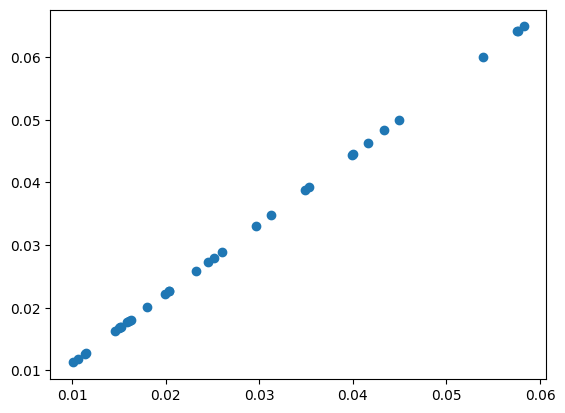

In [53]:
import matplotlib.pyplot as plt
plt.scatter(p, pm)

In [26]:
from MIOFlow.utils import kde
p = kde(x)
xt, mt = model(x, t, m0=torch.log(p))

In [27]:
mt

tensor([-3.4163, -3.6320, -3.1697, -2.7523, -4.5705, -4.0300, -3.2650, -2.6629,
        -4.4293, -3.7073, -3.3754, -3.9927, -3.4908, -3.2068, -2.7580, -2.9717,
        -3.7847, -3.9278, -3.7643, -2.8109, -4.3638, -2.6927, -4.1361, -2.6259,
        -3.8673, -5.3358, -4.8274, -3.0422, -2.9336, -3.7751, -4.3637, -3.9938],
       grad_fn=<SelectBackward0>)

In [28]:
xt, mt = model(x, t)

In [29]:
mt

tensor([ 0.0031,  0.1145,  0.2209,  0.0943, -0.4582,  0.0901, -0.0463,  0.0178,
        -0.1957, -0.1626, -0.1342,  0.0520,  0.1155,  0.2234,  0.1529,  0.1413,
        -0.1297, -0.0389,  0.0546,  0.1499, -0.3348, -0.0015, -0.0732,  0.0518,
         0.3107, -0.5655, -0.2961, -0.1147,  0.2331,  0.1677, -0.4319,  0.1902],
       grad_fn=<SelectBackward0>)

In [22]:
xtseq, mtseq = model(x, t, return_whole_sequence=True)

In [21]:
xtseq, mtseq = model(x, t, return_whole_sequence=True, m0=p)

In [14]:
model = make_model(feature_dims=feature_dim, which='sde_growth_rate', noise_type='diagonal', sde_type='ito', method='euler')

In [15]:
from MIOFlow.utils import kde
p = kde(x)
xt, mt = model(x, t, m0=p)